In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
n_rounds = 10;

# Helper function to read input data
def read_input(s):
    df = pd.read_csv(s, header=None, names=['execution_time'])
    return df\
    .mask(df['execution_time'] > df['execution_time'].quantile(0.975), axis=0)

In [3]:
add_flow_baseline = pd.read_csv("./data/tmp/add_flow_BASELINE");
add_flow_sgx = pd.read_csv("./data/tmp/add_flow_SGX");
add_flow_hotcall = pd.read_csv("./data/tmp/add_flow_HOTCALL");
add_flow_optimized = pd.read_csv("./data/tmp/add_flow_OPTIMIZED");
add_flow_bundle = pd.read_csv("./data/tmp/add_flow_BATCHING");

In [4]:
add_flow_baseline.median()

32379    14280.0
dtype: float64

In [5]:
add_flow_hotcall.median()

321004    32723.0
dtype: float64

In [6]:
add_flow_optimized.median()

224162    20685.0
dtype: float64

In [7]:
add_flow_bundle.median()

227095    26575.0
dtype: float64

In [8]:
add_flow_sgx.median()

231478    206067.0
dtype: float64

In [9]:
add_flows = pd.DataFrame({
    "vanilla": [add_flow_baseline.median()[0]],
    "sgx": [add_flow_sgx.median()[0]],
    "hotcall": [add_flow_hotcall.median()[0]],
    "opt": [add_flow_optimized.median()[0]],
    "bundle": [add_flow_bundle.median()[0]]
})
add_flows.head()

,bundle,hotcall,opt,sgx,vanilla
0,26575.0,32723.0,20685.0,206067.0,14280.0


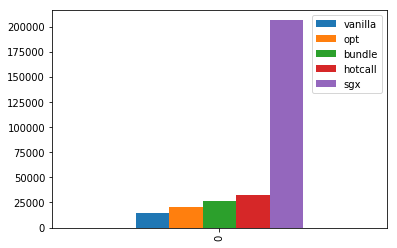

In [10]:
add_flows[['vanilla', 'opt', 'bundle', 'hotcall', 'sgx']].plot.bar()

In [23]:
del_flow_baseline = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_BASELINE");
del_flow_sgx = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_SGX");
del_flow_hotcall = pd.read_csv("./data/tmp/del_flow_sz_1/del_flow_loose_HOTCALL");
del_flow_optimized = pd.read_csv("./data/tmp/del_flow_loose_OPTIMIZED");
del_flow_bundle = pd.read_csv("./data/tmp/del_flow_loose_BATCHING");

In [24]:
del_flow_baseline.median()

233518    40441.0
dtype: float64

In [25]:
del_flow_sgx.median()

313919    175878.0
dtype: float64

In [26]:
del_flow_hotcall.median()

209535    49848.0
dtype: float64

In [27]:
del_flow_optimized.median()

193657    44984.0
dtype: float64

In [22]:
del_flow_bundle.median()

192597    48493.0
dtype: float64

In [18]:
del_flows = pd.DataFrame({
    "vanilla": [del_flow_baseline.median()[0]],
    "sgx": [del_flow_sgx.median()[0]],
    "hotcall": [del_flow_hotcall.median()[0]],
    "opt": [del_flow_optimized.median()[0]],
    "bundle": [del_flow_bundle.median()[0]]
})
del_flows.head()

,bundle,hotcall,opt,sgx,vanilla
0,87865.0,152979.0,80615.0,1085578.0,66502.0


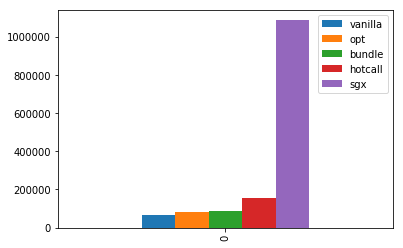

In [20]:
del_flows[['vanilla', 'opt', 'bundle', 'hotcall', 'sgx']].plot.bar()

In [3]:
mod_flow_baseline = pd.read_csv("./data/tmp/mod_flow_loose_BASELINE");
mod_flow_sgx = pd.read_csv("./data/tmp/mod_flow_loose_SGX");
mod_flow_hotcall = pd.read_csv("./data/tmp/mod_flow_loose_HOTCALL");
mod_flow_optimized = pd.read_csv("./data/tmp/mod_flow_loose_OPTIMIZED");
mod_flow_bundle = pd.read_csv("./data/tmp/mod_flow_loose_BATCHING");
mod_flow_memoize = pd.read_csv("./data/tmp/mod_flow_loose_MEMOIZE");

In [4]:
mod_flow_baseline.median()

69734    61487.0
dtype: float64

In [5]:
mod_flow_sgx.median()

2264908    2167853.0
dtype: float64

In [6]:
mod_flow_hotcall.median()

241970    215703.0
dtype: float64

In [7]:
mod_flow_optimized.median()

94025    64378.0
dtype: float64

In [8]:
mod_flow_bundle.median()

111477    75492.0
dtype: float64

In [9]:
mod_flow_memoize.median()

193901    164724.0
dtype: float64